# Comparing speed and performance of deep learning vs non-deep learning models

## Introduction

TODO: Write computer specs

### 💡Definitions:

**Neural networks** are a type of machine learning algorithm that is inspired by the human brain. <br> 
Neural networks are composed of multiple layers of artificial neurons. Each layer is connected to the next layer.<br>
The first layer is the input layer, the last layer is the output layer, and the layers in between are the hidden layers.<br>
The hidden layers are responsible for learning the features of the data. The output layer is responsible for the prediction.<br>

**Non-deep learning** models can also be based on other machine learning algorithms such as decision trees, random forests, and support vector machines. In this notebook we will not be using these models since computer vision problems are more suited for neural networks.

**Deep learning** models are a type of neural network that has multiple hidden layers. Deep learning models are used to solve more complex problems since they are able to learn more hidden patterns in the data.<br>

> "How many layers does a network have to have in order to qualify as deep? There is no definite answer to this (it's a bit like asking how many grains make a heap), but usually having two or more hidden layers counts as deep. In contrast, a network with only a single hidden layer is conventionally called "shallow"." ([Source](https://stats.stackexchange.com/questions/182734/what-is-the-difference-between-a-neural-network-and-a-deep-neural-network-and-w))

![neural networks](types_of_nn.png)

#### Deep Learning vs. Traditional Computer Vision

> A lot of the CV techniques invented in the past 20 years have become irrelevant in recent years because of DL. However, knowledge is never obsolete and there is always something worth learning from each generation of innovation. That knowledge can give you more intuitions and tools to use especially when you wish to deal with 3D CV problems for example. Knowing only DL for CV will dramatically limit the kind of solutions in a CV engineer’s arsenal.

Source: https://arxiv.org/ftp/arxiv/papers/1910/1910.13796.pdf

## Setup

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import time
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import PIL.Image as Image


## 📉 A simple boundary

Summary:
- For simple problems, non-deep learning models are faster and more accurate
- Neural networks are innacurate when the data is not complex enough and we don't account for error margins.
- Deep learning is a waste of time and resources when the data is not complex enough
- Best model: Logistic regression (0.007 seconds training, 0.002 seconds prediction, 100% accuracy)

We will start off with a simple classification problem where the data is linearly separable.

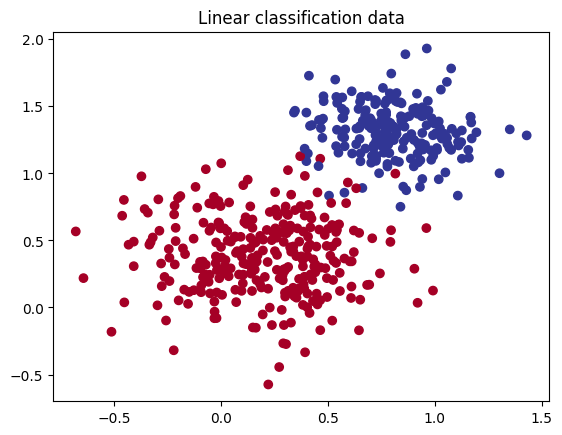

In [2]:
# Load data
linear_data = pd.read_csv('linear_classification.csv', header=None)

# Plot the data
plt.scatter(linear_data[0], linear_data[1], c=linear_data[2], cmap='RdYlBu')
plt.title('Linear classification data')
plt.show()

In [3]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(linear_data[[0, 1]], linear_data[2], test_size=0.2, random_state=0)

### Logistic regression

In [4]:
log_1 = sklearn.linear_model.LogisticRegression()
start_time = time.time()
log_1.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  0.009 seconds


In [5]:
# Test the model
y_pred = log_1.predict(x_test)
print("Accuracy: ", log_1.score(x_test, y_test))

# Time to make one prediction
start_time = time.time()
log_1.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

Accuracy:  1.0
Prediction time:  0.002 seconds


The linear regression model was extremely fast to train (0.002 seconds) and it achieved 100% accuracy.

### Neural network

In [6]:
# A simple neural network with one hidden layer
neural_1 = models.Sequential([
    # input layer
    layers.Dense(64, activation='relu', input_shape=(2,)),
    # one hidden layer
    layers.Dense(64, activation='relu'),
    # output layer with one neuron
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
neural_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
start_time = time.time()
neural_1_hist = neural_1.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  1.8709 seconds


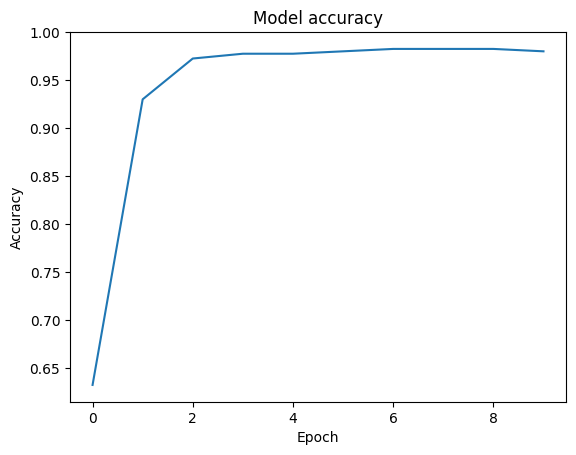

In [8]:
# Learning curves
plt.plot(neural_1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [9]:
# Test the model
start_time = time.time()
y_pred = neural_1.predict(x_test)
end_time = time.time()
print("Testing time: ", round(end_time - start_time, 4), "seconds")
print("Accuracy: ", neural_1.evaluate(x_test, y_test)[1])

4/4 [==============================] - 0s 2ms/step
Testing time:  0.1942 seconds
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Accuracy:  1.0


The neural network model was also fast to train, although longer than the logistic regression model (1.45 seconds). It also achieved 100% accuracy.


### Deep neural network

In [10]:
# A neural network with multiple hidden layers
deepneural_1 = models.Sequential([
    # input layer
    layers.Dense(64, activation='relu', input_shape=(2,)),
    # multiple hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    # output layer with one neuron
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
deepneural_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deepneural_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)               

Epoch 1/10
40/40 [==============================] - 2s 3ms/step - loss: 0.5369 - accuracy: 0.8350
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9375
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.0549 - accuracy: 0.9750
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9775
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9775
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9775
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9800
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9825
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9775
Training time:  3.3

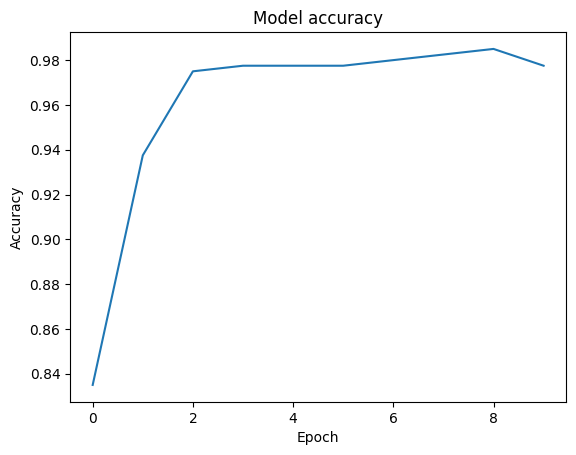

In [11]:
# Train the model
start_time = time.time()
deepneural_1_hist = deepneural_1.fit(x_train, y_train, epochs=10, batch_size=10)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

# Learning curves
plt.plot(deepneural_1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [12]:
# Test the model
start_time = time.time()
y_pred = deepneural_1.predict(x_test)
end_time = time.time()
print("Testing time: ", round(end_time - start_time, 4), "seconds")
print("Accuracy: ", deepneural_1.evaluate(x_test, y_test)[1])

4/4 [==============================] - 0s 2ms/step
Testing time:  0.1818 seconds
4/4 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 1.0000
Accuracy:  1.0


As we can see, the deep neural network was slower to train (1.1337 seconds) and it does not add any value. Actually, because of the complex random stucture, it sometimes does not even achieve 100% accuracy, but had 98-99% accuracy.

## 🧫 A non-linear classification problem

``TODO``: Write a summary

We will now try to solve a non-linear classification problem. In this case, a linear regression model will not be able to solve the problem, since the data is not linearly separable.

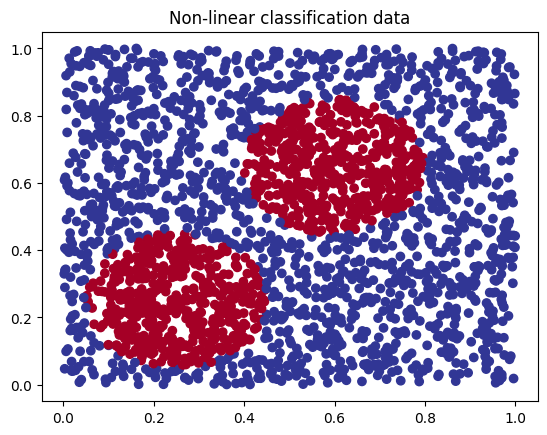

In [13]:
# Load data from the txt file
data = pd.read_csv('non_linear_classification.csv', header=None)

# Plot the data
plt.scatter(data[0], data[1], c=data[2], cmap='RdYlBu')
plt.title('Non-linear classification data')
plt.show()

In [14]:
x = data[[0, 1]]
y = data[2]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Support vector machine

In [15]:
svm_1 = svm.SVC(kernel='rbf')

# Train the model
start_time = time.time()
svm_1.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  0.056 seconds


Accuracy:  0.9721
Prediction time:  0.002 seconds


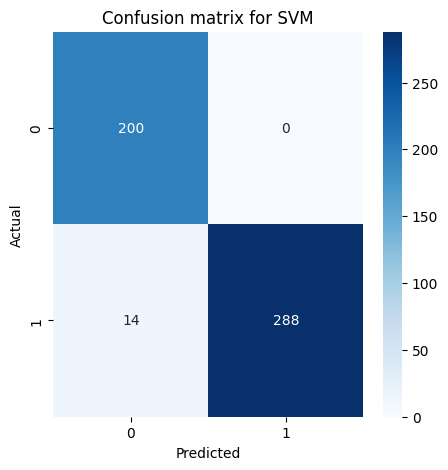

In [16]:
# Evaluate the model
y_pred = svm_1.predict(x_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
svm_1.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The support vector machine model with the RBF (Radial basis function) kernel was very fast to train (0.005 seconds) and it achieved 100% accuracy.

### Neural network

In [17]:
# TODO: Create a neural network with one hidden layer for non-linear classification

### Deep neural network

In [18]:
# TODO: Create a deep neural network with multiple hidden layers for non-linear classification

## 🖼️ Image classification

We now move on to much more complex problems. We will try to classify the images in our dataset which have 3 classes: no people, few people, and many people.

A non-deep learning model has been written for the "non_neuralnetwork_classification" task. We will reuse it here and evaluate its performance.

In [ ]:
df = pd.read_csv('../swarmIoT_full_labeled_dataset.csv')
folder_path = '../ordered_data'

x = []
y = []

dirs = []
dirs.append(os.listdir(f'{folder_path}/0'))
dirs.append(os.listdir(f'{folder_path}/1'))
dirs.append(os.listdir(f'{folder_path}/2'))

for d in dirs:
    np.random.shuffle(d)

for c in range(3):
    for i in range(300):
        path = f'{folder_path}/{c}/{dirs[c][i]}'
        img = Image.open(path)
        img = img.resize((150, 150))
        img = np.array(img)
        x.append(img)
        y.append(c)

x = np.array(x)
y = np.array(y)

# Reshape the data to 2D for the classifier
x = x.reshape(x.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
x = x / 255

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Random forest classifier

In [21]:
rtc_1 = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)

# Train the model
start_time = time.time()
rtc_1.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  64.91 seconds


Accuracy:  0.65
Prediction time:  0.014 seconds


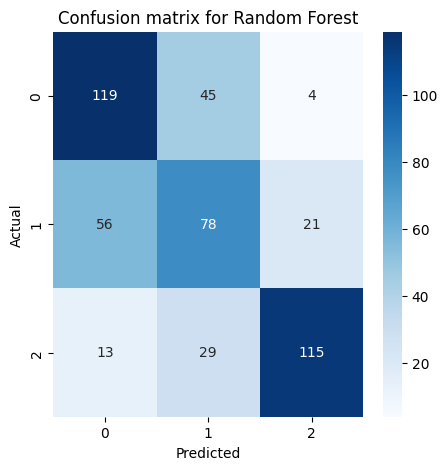

In [23]:
# Test the model
y_pred = rtc_1.predict(x_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
rtc_1.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Support vector machine

Let's now try to solve the same problem with a SVM model. This time we will use a GridSearchCV to find the best parameters for the model, so we don't have to manually try different parameters and have to rerun it multiple times.

Read about the parameters here: https://scikit-learn.org/stable/modules/svm.html#parameters-of-the-rbf-kernel

In [27]:
svc_estimator = svm.SVC(probability=True)
param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svm_2 = GridSearchCV(svc_estimator, param_grid)

In [28]:
# Train the model
start_time = time.time()
svm_2.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

In [ ]:
# Best parameters
print(svm_2.best_params_)

In [ ]:
# Test the model
y_pred = svm_2.predict(x_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
svm_2.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# TODO: Run this

In [ ]:
# TODO: Write conclusion

### Neural network

In [ ]:
# TODO: Clean up the code and write comments

In [65]:
batch_size = 32
img_height = 150
img_width = 150

In [66]:
train_ds = keras.utils.image_dataset_from_directory(
  "../ordered_data",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.utils.image_dataset_from_directory(
  "../ordered_data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6627 files belonging to 3 classes.
Using 5302 files for training.
Found 6627 files belonging to 3 classes.
Using 1325 files for validation.


In [67]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [68]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [142]:
# Neural network with one hidden layer
model1 = Sequential([
    layers.Reshape((150*150*3,), input_shape=(150, 150, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [143]:
model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [144]:
model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 67500)             0         
                                                                 
 dense_48 (Dense)            (None, 128)               8640128   
                                                                 
 dense_49 (Dense)            (None, 3)                 387       
                                                                 
Total params: 8,640,515
Trainable params: 8,640,515
Non-trainable params: 0
_________________________________________________________________


In [145]:
start_time = time.time()
epochs = 5
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
end_time = time.time()
print("Time taken to train the model: ", round(end_time - start_time, 2), " seconds")

Epoch 1/5
166/166 [==============================] - 15s 89ms/step - loss: 2308.4102 - accuracy: 0.4510 - val_loss: 2671.7573 - val_accuracy: 0.2687
Epoch 2/5
166/166 [==============================] - 15s 88ms/step - loss: 647.1731 - accuracy: 0.4579 - val_loss: 246.3385 - val_accuracy: 0.5140
Epoch 3/5
166/166 [==============================] - 14s 85ms/step - loss: 496.2695 - accuracy: 0.4876 - val_loss: 687.0433 - val_accuracy: 0.2604
Epoch 4/5
166/166 [==============================] - 14s 84ms/step - loss: 366.7684 - accuracy: 0.4847 - val_loss: 797.4852 - val_accuracy: 0.2392
Epoch 5/5
166/166 [==============================] - 14s 84ms/step - loss: 380.9934 - accuracy: 0.4742 - val_loss: 197.0348 - val_accuracy: 0.3758
Time taken to train the model:  72.02  seconds


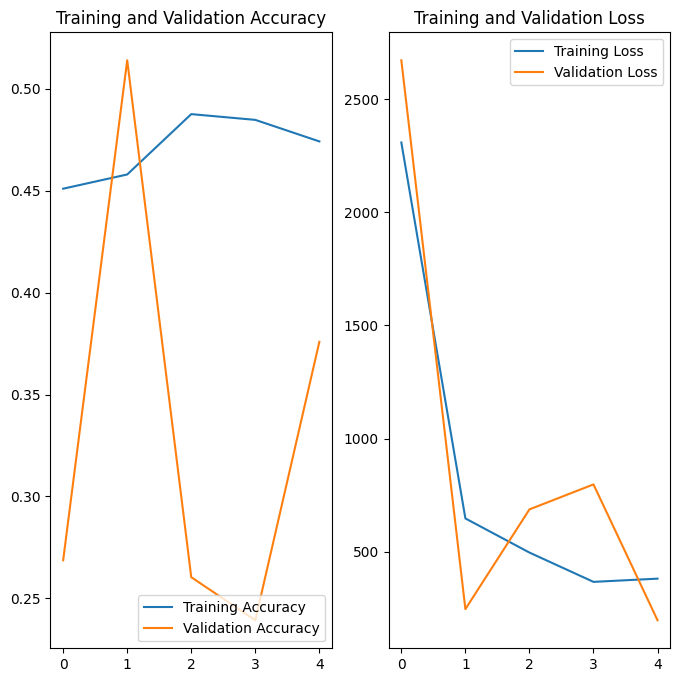

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Each epoch took around 15 seconds. 5 epochs took 73.03 seconds. <br>
The accuracy reached 0.6219. <br>

1/1 [==============================] - 0s 26ms/step
[[-39.147083 -36.896343 -39.23985 ]]


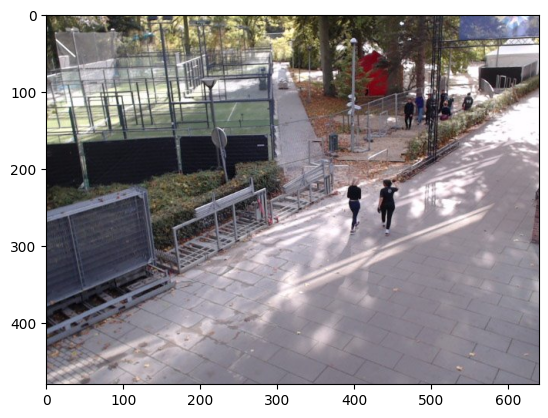

In [129]:
# Plot some images and their predictions
path = "../ordered_data"
images = os.listdir(f'{path}/2')
test_image = PIL.Image.open(f"{path}/2/{images[500]}")
plt.imshow(test_image)
predict = model1.predict(np.array([np.array(test_image.resize((img_width, img_height)))]))
print(predict)

### Deep neural network

In [ ]:
# TODO: Write code and comments for Deep Neural Network

### Very deep neural network

In [ ]:
# TODO: Use a pretrained model with transfer learning for image classification, 
# to evaluate the performance of a model with a very large number of parameters

## Conclusion

In [ ]:
# TODO: Write conclusion